In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data_process = pd.read_csv("entrada.csv")
alarm_var = pd.read_csv("alarm_list.csv")

In [55]:
def step_signal (low, s_low, high, s_high, larg_high_i, larg_high_f, larg_low_i, larg_low_f, prob_positivo, n):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [91]:
x0 = step_signal(3,0.2,7,0.3,20,100,20,100,0.5,100)
x1 = step_signal(3,0.2,7,0.3,20,100,20,100,0.5,100)


pd.options.display.max_rows = len(x0)

if len(x0) > len(x1):
    if x1[len(x1)-1] >= 2.8 and x1[len(x1)-1] <= 3.2:
        x1 = np.concatenate((x1,np.random.uniform(3-0.2,3+0.2,len(x0)-len(x1))))
    elif x1[len(x1)-1] >= 6.7 and x1[len(x1)-1] <= 7.3:
        x1 = np.concatenate((x1,np.random.uniform(7-0.3,7+0.3,len(x0)-len(x1))))
else:
    delete = np.nonzero(x1[len(x0):])
    x1 = np.delete(x1,delete)
    
tout = np.arange(0,3,3/len(x0),dtype=float)
df = pd.DataFrame({'tout': tout})
df['x0'] = x0
df['x1'] = x1   
df['log'] = 0 
df.head()

,tout,x0,x1,log
0,0.000000,3.088613,2.855667,0
1,0.000511,2.818992,2.923973,0
2,0.001022,3.084722,2.891564,0
3,0.001533,2.908441,2.877077,0
4,0.002045,3.063941,3.185211,0


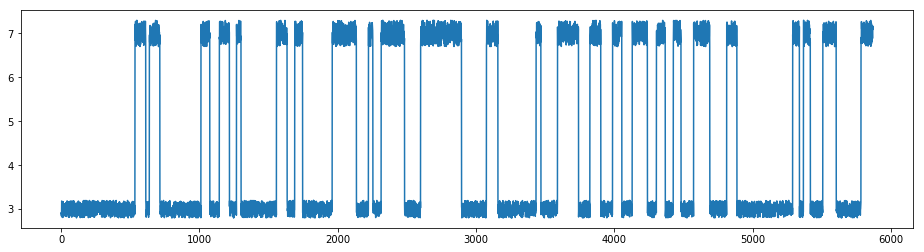

In [96]:
plt.figure(figsize=(16,4))
plt.plot(df['x1'])


0.04089282671664679
0


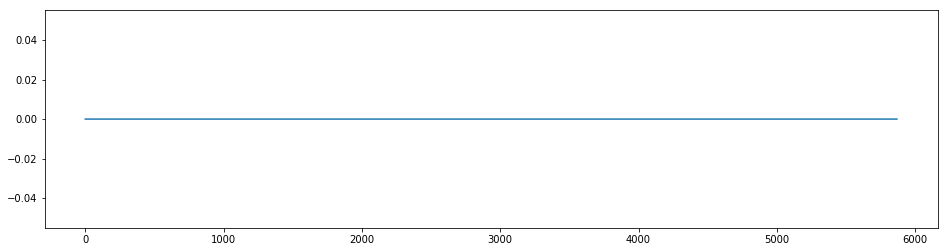

In [151]:
limit = 5 
type_ = 'high' 
delay_time = 80*3/len(x1)
dead_band = 60*3/len(x1)

t_delay = 0
t_dead = 0
log_alarm = np.arange(len(x1))


if type_ == 'high':
    for i in np.arange(len(x1)):
        if x1[i] > limit:
            t_delay = t_delay + 3/len(x1)
            if t_delay >= delay_time:
                log_alarm[i] = 1
            else:
                log_alarm[i] = 0
        if log_alarm[i-1] == 1:
                t_dead = t_dead + 3/len(x1)
                if t_dead >= dead_band:
                    log_alarm[i] = 0
                    t_delay = 0
                    t_dead = 0
        else:
                log_alarm[i] = 0
                t_delay = 0
                
            
print(delay_time)
print(t_delay)
plt.figure(figsize=(16,4))
plt.plot(log_alarm)

In [117]:
# limit = 5 
# type_ = 'high' 
# delay_time = 1000*3/len(x0)
# dead_band = 8*3/len(x0)

# t_delay = 0
# if type_ == 'high':
#     df['log'] = df['x1'] > limit



In [98]:
# plt.figure(figsize=(16,4))
# plt.plot(df['log'])

In [99]:
# plt.figure(figsize=(16,4))
# df['x1'].rolling(80).apply(lambda x: np.all(x>limit)).plot()

In [110]:
print(log_alarm)

[0 0 0 ... 1 1 1]


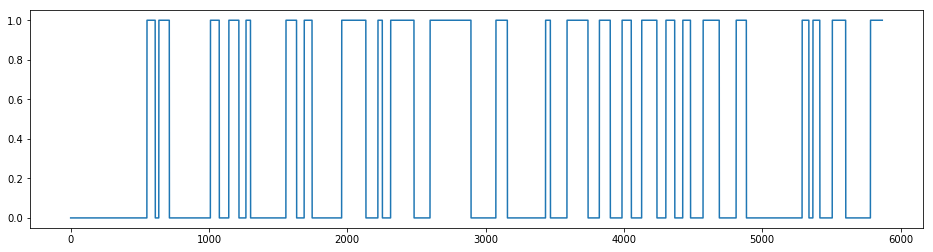